# **Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework.**

Alumno: Carlos David Lozano Sanguino

Matricula: A01275316

# DATASET UTILIZADO: Salary Dataset
Link:https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

Este conjunto de datos contiene un registro del Salario de multiples usuarios o personas dependiendo de la cantidad de años o meses que han trabajado siendo la variable independiente la cantidad de años

Salary Prediction Data: Para este portafolio se implementara la tecnica machine learning linear regression de manera manual para la prediccion de los salarios de una persona teniendo en cuenta la cantidad de años que ha trabajado por lo tanto este dataset se dividira entre dos columnas que sera Años de Experiencia y la columna o datos a predecir denominada como Salario:
- YearsExperience: Variable Independiente X con valores float
- Salary: Variable Dependiente y con valores float mucho mas altos siendo por el salario de las personas.

El dataset esta conformado solo por estas dos columnas, el tamaño del dataset es de 2 columnas y 30 filas siendo un total de 60 datos por todo el dataset, es un dataset muy pequeño ya que esta hecho para practias enfocadas a regresiones lineales simples.

Para el presente entregable se aplicara una regresion lineal el cual aprendera de los datos de entrenamiento y prueba con el fin de poder predecir con el modelo entrenado el monto o salario total que una persona tendria dependiendo del año o tiempo que se le ponga buscando tener la mejor precision sin error posible aplicando algoritmos matematicos relacionado a la regresion lineal para llevar a cabo la meta de este reporte.

A continuacion se utilizara solo y exclusivamente la libreria pandas y matplotlib para demostar los datos como parte del entregable junto con la visualizacion del modelo,la implementacion del algoritmo sera sin framework

In [22]:
import pandas as pd
import numpy as np
import random
Salary = pd.read_csv("Salary_Data.csv")
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Para empezar se toma las variables X y y del dataset y se añaden a una lista

In [7]:
Experience_Time = [1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8, 7.1, 7.9, 8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5]
Salary = [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]

Tras haber definido esto se divide el conjunto de datos en datos de entrenamiento y datos de prueba para su uso en un modelo de regresión lineal. Se define el porcentaje de datos de entrenamiento siendo el 80% por el tamaño de datos, despues se calcula el tamaño de las muestras para la division de datos de entrenamiento y pruebas usando zip para combinar las caracteristicas y etiquetas en pares.

In [8]:
# Porcentaje de datos que se usarán para entrenamiento
train_percent = 0.8

# Calcula el número de muestras para entrenamiento y prueba
total_samples = len(Experience_Time)
train_samples = int(total_samples * train_percent)
test_samples = total_samples - train_samples

# Combina las características y etiquetas en pares de datos
data = list(zip(Experience_Time, Salary))

# Mezcla los datos aleatoriamente para evitar sesgos
random.shuffle(data)

# Divide los datos en conjuntos de entrenamiento y prueba
train_data = data[:train_samples]
test_data = data[train_samples:]

# Separa las características y etiquetas en conjuntos de entrenamiento y prueba
X_train, y_train = zip(*train_data)
X_test, y_test = zip(*test_data)

Tras haber divido los datos en subsets de entrenamiento y prueba sigue la aplicacion e implementacion del modelo de regresion linear usando funciones en las que se usara Gradiente Descendente y definicion de la funcion de costo con GD:

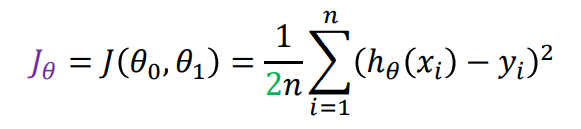

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Tambien se definen los thetas y la cantidad de iteraciones para entrenar al modelo que seran 1000, al final se entrena el modelo con la funcion de gradient_descent los datos de entrenamiento y prueba, tambien se crea una funcion para la prediccion de los datoss y ver como se comporta el modelo de regresion lineal

In [20]:
# Coeficientes iniciales (theta_0 y theta_1)
theta_0 = 0
theta_1 = 0

# Tasa de aprendizaje (alpha) y número de iteraciones
alpha = 0.01
num_iterations = 1000

# Función para realizar una iteración del descenso de gradiente
def gradient_descent(X, y, theta_0, theta_1, alpha):
    m = len(X)
    gradient_theta_0 = 0
    gradient_theta_1 = 0

    for i in range(m):
        prediction = theta_0 + theta_1 * X[i]
        gradient_theta_0 += (prediction - y[i])
        gradient_theta_1 += (prediction - y[i]) * X[i]

    theta_0 -= (alpha * gradient_theta_0) / m
    theta_1 -= (alpha * gradient_theta_1) / m

    return theta_0, theta_1

# Entrenamiento del modelo (descenso de gradiente)
for _ in range(num_iterations):
    theta_0, theta_1 = gradient_descent(X_train, y_train, theta_0, theta_1, alpha)

# Función para realizar predicciones
def predict(X, theta_0, theta_1):
    predictions = []
    for x in X:
        y_pred = theta_0 + theta_1 * x
        predictions.append(y_pred)
    return predictions

# Realizar predicciones en el conjunto de prueba
y_pred_test = predict(X_test, theta_0, theta_1)

# Imprimir los coeficientes finales
print(f"Theta_0 (intercepto): {theta_0}")
print(f"Theta_1 (pendiente): {theta_1}")



Theta_0 (intercepto): 21235.24758513597
Theta_1 (pendiente): 10065.095597649239


In [21]:
# Imprimir las predicciones en el conjunto de prueba
print("Predicciones en el conjunto de prueba:")
for i in range(len(X_test)):
    print(f"Experience_Time: {X_test[i]}, Predicción de Salary: {y_pred_test[i]}")

Predicciones en el conjunto de prueba:
Experience_Time: 3.2, Predicción de Salary: 53443.55349761354
Experience_Time: 9.5, Predicción de Salary: 116853.65576280374
Experience_Time: 3.7, Predicción de Salary: 58476.10129643816
Experience_Time: 3, Predicción de Salary: 51430.534378083685
Experience_Time: 1.5, Predicción de Salary: 36332.89098160983
Experience_Time: 2, Predicción de Salary: 41365.438780434444


Resultado de predicciones y comparacion entre las predicciones generadas y los valores que debieron obtenerse

-Valores Originales:
Experience_Time: 3.2, Predicción de Salary: 64445.0

Experience_Time: 9.5, Predicción de Salary: 116969.0

Experience_Time: 3.7, Predicción de Salary: 57189.0

Experience_Time: 3, Predicción de Salary: 60150.0

Experience_Time: 1.5, Predicción de Salary: 37731.0

Experience_Time: 2, Predicción de Salary: 43525.0


-Valores de predicciones:

Experience_Time: 3.2, Predicción de Salary: 53443.55349761354

Experience_Time: 9.5, Predicción de Salary: 116853.65576280374

Experience_Time: 3.7, Predicción de Salary: 58476.10129643816

Experience_Time: 3, Predicción de Salary: 51430.534378083685

Experience_Time: 1.5, Predicción de Salary: 36332.89098160983

Experience_Time: 2, Predicción de Salary: 41365.438780434444

Al final se corren multiples predicciones los cuales a pesar de no ser exactos tienen un valor aproximado tomando los datos de prueba y no los de entrenamiento para la revision del modelo, algunos varian entre 1,000 o 9,000 pero la mayoria de las predicciones tiene un error minimo demsotrando que el modelo tiene buena tendencia pero se confirmara a continuacion con las metricas de desempeño.

Metricas de Desempeño:

Se calculan varias métricas de desempeño para evaluar la calidad de las predicciones realizadas por un modelo de regresión lineal en un conjunto de prueba. Aquí está una explicación de las métricas y sus resultados:




In [18]:
# Calcula la suma de los errores cuadráticos
sse = sum((y_test[i] - y_pred_test[i]) ** 2 for i in range(len(X_test)))

# Calcula la suma total de los cuadrados
sst = sum((y_test[i] - sum(y_test) / len(y_test)) ** 2 for i in range(len(X_test)))

# Calcula el coeficiente de determinación (R-cuadrado)
r_squared = 1 - (sse / sst)

# Calcula el error absoluto medio (MAE)
mae = sum(abs(y_test[i] - y_pred_test[i]) for i in range(len(X_test))) / len(X_test)

# Calcula el error cuadrático medio (MSE)
mse = sse / len(X_test)

# Calcula la raíz del error cuadrático medio (RMSE)
rmse = (mse ** 0.5)

# Imprime las métricas de desempeño
print(f"Coeficiente de Determinación (R-cuadrado): {r_squared:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

Coeficiente de Determinación (R-cuadrado): 0.95
Error Absoluto Medio (MAE): 4113.50
Error Cuadrático Medio (MSE): 34224875.57
Raíz del Error Cuadrático Medio (RMSE): 5850.20


- Suma de Errores Cuadráticos (SSE): La variable sse calcula la suma de los errores cuadráticos individuales entre las predicciones (y_pred_test) y los valores reales (y_test) en el conjunto de prueba. Es una medida de cuánto se alejan las predicciones del modelo de los valores reales.

- Suma Total de Cuadrados (SST): La variable sst calcula la suma total de los cuadrados de las diferencias entre los valores reales en el conjunto de prueba y la media de esos valores. SST es una medida de la variabilidad total en los datos de prueba.

- Coeficiente de Determinación (R-cuadrado): El coeficiente de determinación es una métrica que proporciona una medida de cuánta variabilidad en los valores de la variable dependiente (en este caso, Salary) es explicada por el modelo de regresión. Se calcula como 1 menos la razón entre SSE y SST. Un R-cuadrado cercano a 1 indica que el modelo explica una gran parte de la variabilidad en los datos. En este caso, el valor de R-cuadrado es 0.95, lo que sugiere que el modelo explica el 95% de la variabilidad en los datos.

- Error Absoluto Medio (MAE): MAE calcula el promedio de los valores absolutos de los errores entre las predicciones y los valores reales. Es una medida de la magnitud promedio de los errores en el conjunto de prueba. En este caso, el valor de MAE es 4113.50, lo que significa que, en promedio, las predicciones se desvían en alrededor de $4113.50 de los valores reales(Como se vio en la comparacion de predicciones en promedio el desvio era de 1000 a 9000 en el que la media en general variaba entre 4000 y 5000 con esto se confirma lo dado anteriormente).

- Error Cuadrático Medio (MSE): MSE calcula el promedio de los errores cuadráticos entre las predicciones y los valores reales. Es una medida que penaliza los errores más grandes de manera más significativa que los errores pequeños. En este caso, el valor de MSE es 34224875.57.

- Raíz del Error Cuadrático Medio (RMSE): RMSE es la raíz cuadrada del MSE y proporciona una medida de la magnitud promedio de los errores en la misma unidad que la variable objetivo. En este caso, el valor de RMSE es 5850.20, lo que significa que, en promedio, las predicciones se desvían en alrededor de $5850.20 de los valores reales.

En resumen, los resultados sugieren que el modelo de regresión lineal tiene un buen rendimiento en la predicción de los salarios, ya que el coeficiente de determinación (R-cuadrado) es alto y los errores (MAE, MSE, RMSE) son relativamente bajos. Esto indica que el modelo es capaz de explicar y predecir la variabilidad en los datos de manera efectiva


Visualizacion del Modelo y los Datos:

Esta visualizacion de los datos nos ayuda a ver como se aproxima la regresion lineal a los valores reales y podemos ver que el modelo sigue el flujo o comportamiento de los datos tocando y aproximandose a los reales existen algunos lejos de la regresion lineal siendo mas outliers pero el resto tienen un minimo error.

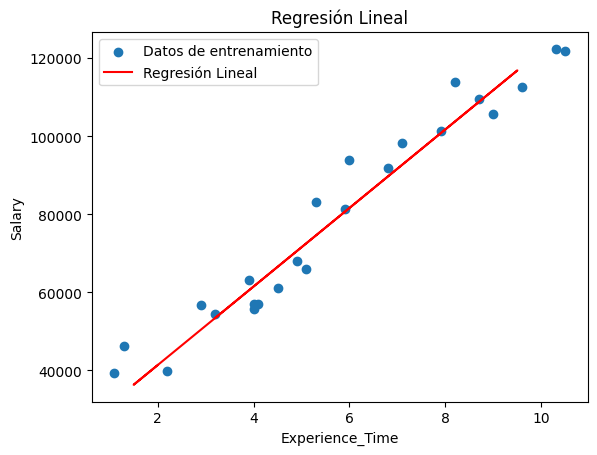

In [10]:
# Graficar la regresión lineal y los datos
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, label='Datos de entrenamiento')
plt.plot(X_test, y_pred_test, color='red', label='Regresión Lineal')
plt.xlabel('Experience_Time')
plt.ylabel('Salary')
plt.title('Regresión Lineal')
plt.legend()
plt.show()